In [ ]:
import os
ROOT = "/content/drive/MyDrive/Colab Notebooks"
os.chdir(ROOT)

In [ ]:
os.getcwd()

'/content/drive/MyDrive/Colab Notebooks'

CNN EXPLAINER [ CHECK AT THE END ]

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [ ]:
# READ IMAGE

def read_img(path:str, grayScale=True):
    img = cv2.imread(path)
    
    if grayScale:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        plt.imshow(img, cmap="gray")
        return img
    try:
        cv2.imshow("display",img)
        return img
    except Exception as e:
        print(e)
        from google.colab.patches import cv2_imshow # This is on your colab
        cv2_imshow(img)
        return img

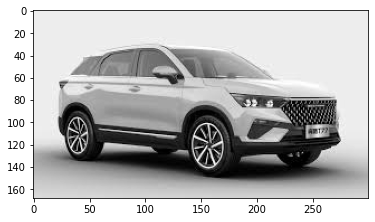

In [ ]:
img_path = "car1.jpeg"
car = read_img(img_path, grayScale=True)

cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash; see https://github.com/jupyter/notebook/issues/3935.
As a substitution, consider using
  from google.colab.patches import cv2_imshow



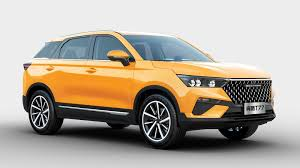

In [ ]:
color_car = read_img(img_path, grayScale=False)

In [ ]:
display(car.shape)
display(color_car.shape)

(168, 300)

(168, 300, 3)

APPLY A SINGLE CONV LAYER

In [ ]:
row, col = car.shape
batch = 1 # SINGLE IMAHE THERE
ch = 1
reshaped_car_img = car.reshape(batch, row, col, ch)
reshaped_car_img.shape

(1, 168, 300, 1)

In [ ]:
from tensorflow.python import summary
input_shape = reshaped_car_img.shape[1:]
input_shape

CONV_LAYER = [
    tf.keras.layers.Conv2D(
        filters=1,
        kernel_size=(3,3),
        strides=(1,1),
        input_shape=input_shape
    )
]

conv_model = tf.keras.Sequential(CONV_LAYER)
conv_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 166, 298, 1)       10        
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [ ]:
out = conv_model.predict(reshaped_car_img)
out.shape

(1, 166, 298, 1)

In [ ]:
(168-3+2*0)//1 + 1

166

In [ ]:
(300 - 3 + 2*(0))//1 + 1

298

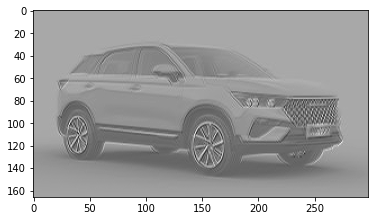

In [ ]:
_, row, col, _ = out.shape
reshape_out = out.reshape(row, col)
plt.imshow(reshape_out, cmap='gray')

FOR COLOR IMAGE

In [ ]:
row, col, ch = color_car.shape
color_car_reshaped = color_car.reshape(1, row, col, ch)
color_car_reshaped.shape

(1, 168, 300, 3)

In [ ]:
input_shape = color_car_reshaped.shape[1:]

CONV_LAYER = [
    tf.keras.layers.Conv2D(
        filters=1,
        kernel_size=(3,3),
        strides=(1,1),
        input_shape=input_shape
    )
]
conv_model = tf.keras.Sequential(CONV_LAYER)
conv_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 166, 298, 1)       28        
                                                                 
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________


In [ ]:
3*3*3+1

28

In [ ]:
out = conv_model.predict(color_car_reshaped)
out.shape

(1, 166, 298, 1)

In [ ]:
(168 - 3 + 2*0)//1 + 1

166

In [ ]:
(300 - 3 + 2*0)//1 + 1

298

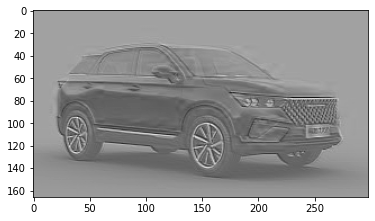

In [ ]:
_,row, col, _ = out.shape
reshape_out = out.reshape(row,col)
plt.imshow(reshape_out, cmap = "gray")

In [ ]:
# RESHAPING IMAGE FUNCTION
def reshaping_in(img, grayScale=True):
    if grayScale:
        row, col = img.shape
        img = img.reshape(1, row, col, 1)
        return img

    row, col, ch = img.shape
    color_img = img.reshape(1, row, col, ch)
    return color_img

In [48]:
# CONV MODEL FUNCTION
def get_conv_model(filters=1,kernel_size=(3,3),strides=(1,1),input_shape=None, padding="valid"):
    CONV_LAYER = [
        tf.keras.layers.Conv2D(
            filters=filters,
            kernel_size=kernel_size,
            strides=strides,
            input_shape=input_shape
        )
    ]

    conv_model = tf.keras.Sequential(CONV_LAYER)
    conv_model.summary()
    return conv_model

In [49]:
# APPLY MODEL AND VISUALIZE
def apply_conv_model_and_visualize(img, conv_model):
    try:
        out = conv_model.predict(img)
        print(out.shape)
        _, row, col, channels = out.shape
        reshape_out = out.reshape(row, col, channels)
        for channel in range(channels):
            print(channel)
            plt.imshow(reshape_out[:,:,channel], cmap="gray")
            plt.show()
    except Exception as e:
        raise e

cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash; see https://github.com/jupyter/notebook/issues/3935.
As a substitution, consider using
  from google.colab.patches import cv2_imshow



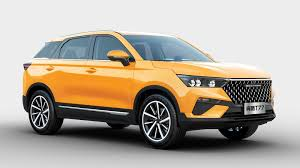

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 166, 298, 1)       28        
                                                                 
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________
(1, 166, 298, 1)
0


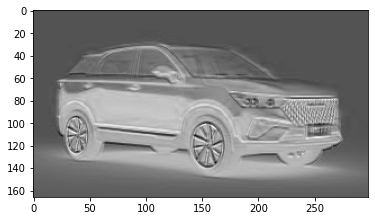

In [53]:
from warnings import filters
img = read_img(img_path,grayScale=False)
input_img = reshaping_in(img, grayScale=False)
model = get_conv_model(
    filters=1,
    kernel_size=(3,3),
    strides=(1,1),
    input_shape=input_img.shape[1:],
    padding="valid"
)
apply_conv_model_and_visualize(input_img, model)

cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash; see https://github.com/jupyter/notebook/issues/3935.
As a substitution, consider using
  from google.colab.patches import cv2_imshow



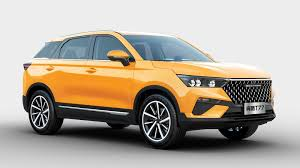

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 166, 298, 5)       140       
                                                                 
Total params: 140
Trainable params: 140
Non-trainable params: 0
_________________________________________________________________
(1, 166, 298, 5)
0


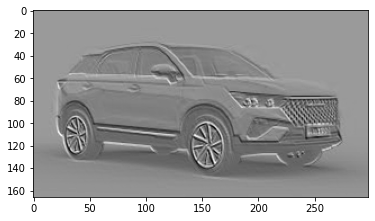

1


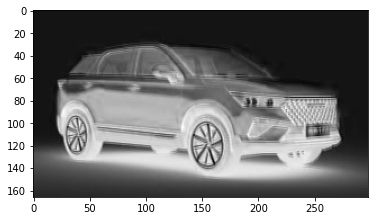

2


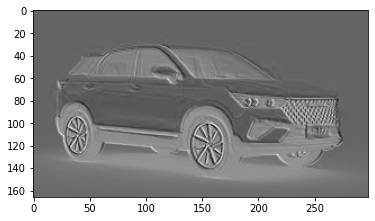

3


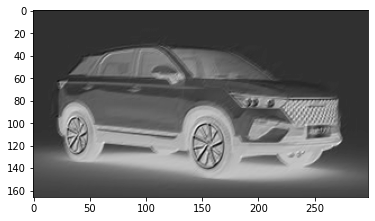

4


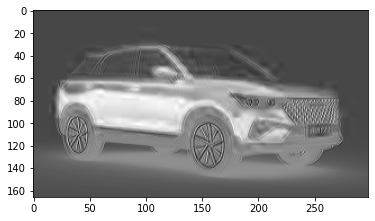

In [54]:

from warnings import filters
img = read_img(img_path,grayScale=False)
input_img = reshaping_in(img, grayScale=False)
model = get_conv_model(
    filters=5,
    kernel_size=(3,3),
    strides=(1,1),
    input_shape=input_img.shape[1:],
    padding="valid"
)
apply_conv_model_and_visualize(input_img, model)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 166, 298, 1)       10        
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________
(1, 166, 298, 1)
0


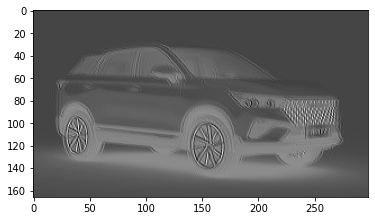

In [55]:
from warnings import filters
img = read_img(img_path,grayScale=True)
input_img = reshaping_in(img, grayScale=True)
model = get_conv_model(
    filters=1,
    kernel_size=(3,3),
    strides=(1,1),
    input_shape=input_img.shape[1:],
    padding="valid"
)
apply_conv_model_and_visualize(input_img, model)

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 166, 298, 5)       50        
                                                                 
Total params: 50
Trainable params: 50
Non-trainable params: 0
_________________________________________________________________
(1, 166, 298, 5)
0


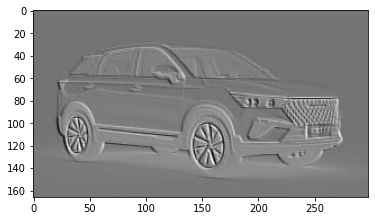

1


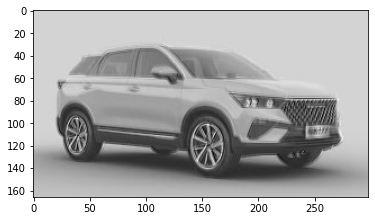

2


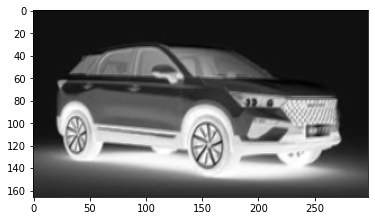

3


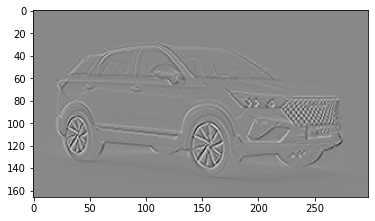

4


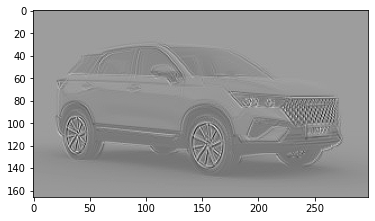

In [56]:
from warnings import filters
img = read_img(img_path,grayScale=True)
input_img = reshaping_in(img, grayScale=True)
model = get_conv_model(
    filters=5,
    kernel_size=(3,3),
    strides=(1,1),
    input_shape=input_img.shape[1:],
    padding="valid"
)
apply_conv_model_and_visualize(input_img, model)

In [69]:
# MAX POOLING FUNCTION
def max_pooling(img, pool_size=(2,2), strides=(2,2)):
    reshped_img = reshaping_in(img)
    pooling_layer = tf.keras.layers.MaxPool2D(
        pool_size=pool_size,
        strides=strides
    )
    result = pooling_layer(reshped_img)
    return result

(168, 300)


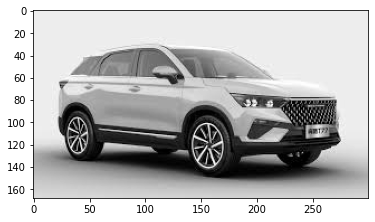

In [70]:
img = read_img(img_path)
print(img.shape)

In [71]:
result = max_pooling(img)
print(result.shape)

(1, 84, 150, 1)


In [72]:
(168 - 3)//2 + 1

83

In [73]:
(300 - 3)//2 + 1

149

In [74]:
def plot_pooling(result):
  _, row, col, _ = result.shape
  reshape_img = tf.reshape(result, (row, col))
  plt.imshow(reshape_img, cmap="gray")

In [75]:
_, row, col, _ = result.shape

reshape = tf.reshape(result, (row, col))

In [76]:
result = max_pooling(reshape.numpy())
result.shape

TensorShape([1, 42, 75, 1])

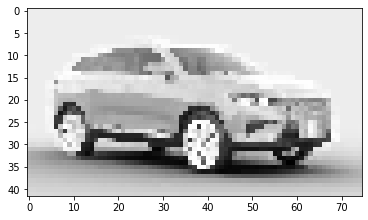

In [77]:
plot_pooling(result)